## Importing the data and libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# data import
df=pd.read_csv("data.csv")
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


#### EDA & Preprocessing

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

#### As Column 1 ,2, 3, 4, 5 is physical QUANTITY having numerical value so it should not be object suggesting that some non-numeric character or NaN #### 


In [5]:
df.isnull().sum()  # this give total number of missing values in each column

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [7]:
num_cols = df.columns[:28]
n_cols = 4
n_rows = len(num_cols) // n_cols + 1

plt.figure(figsize=(20, n_rows * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()



KeyboardInterrupt



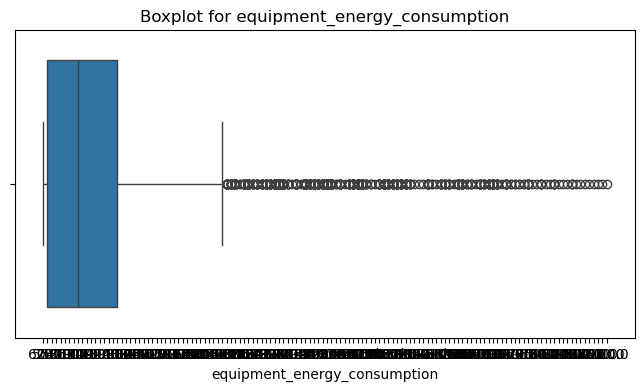

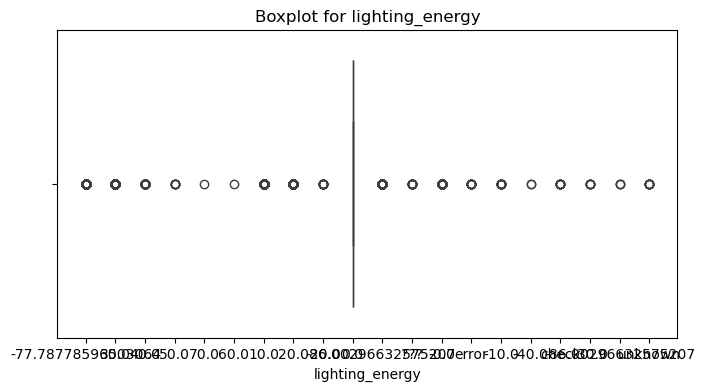

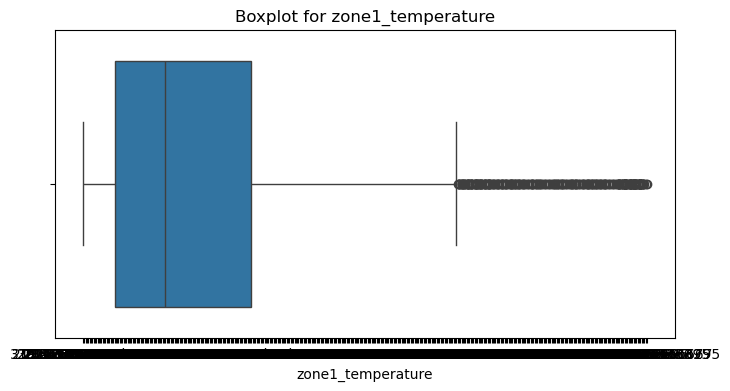

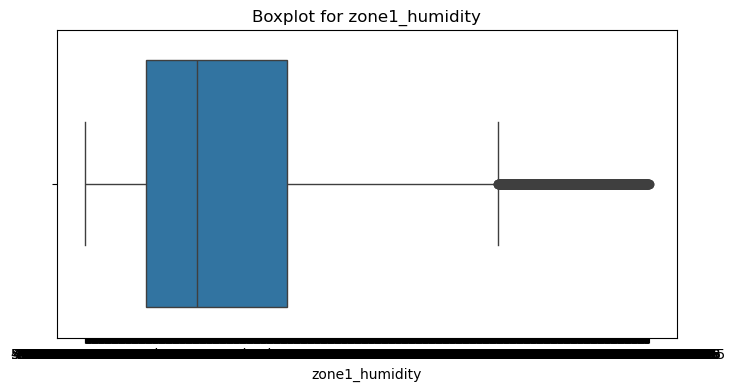

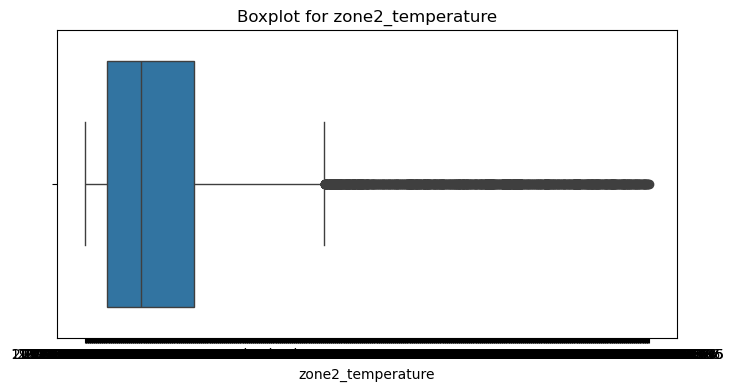

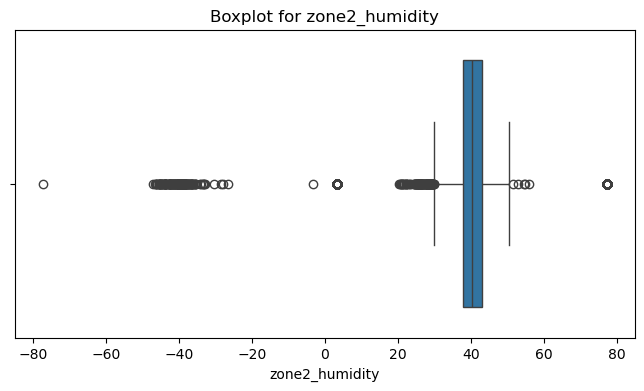

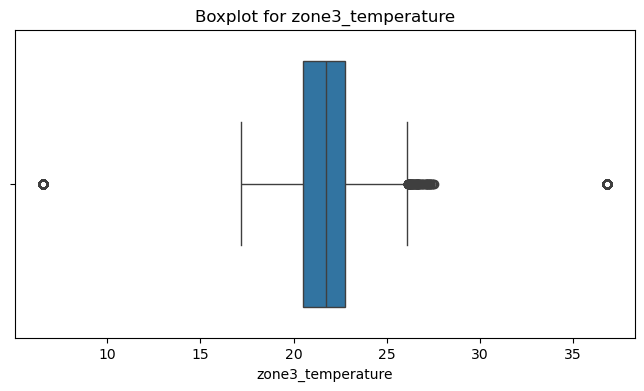

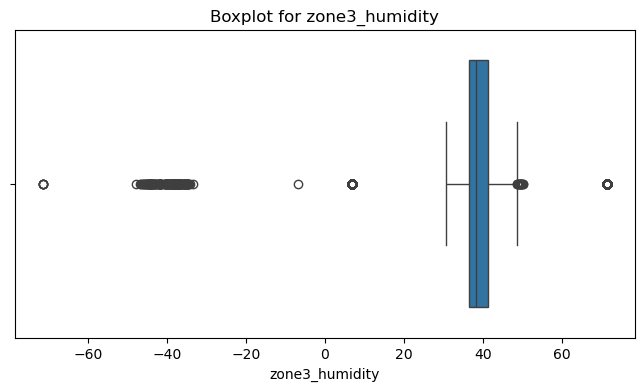

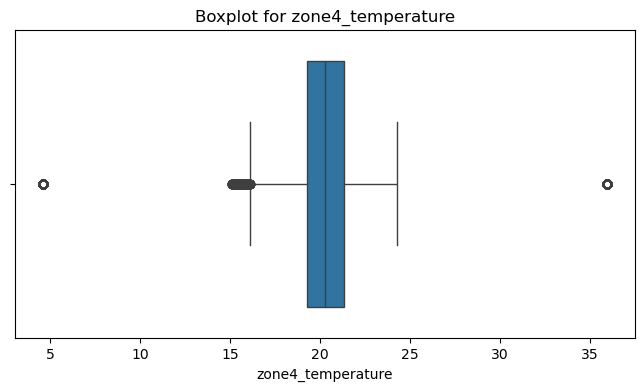

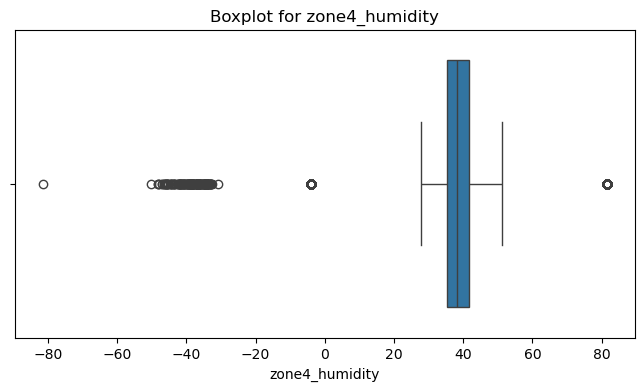

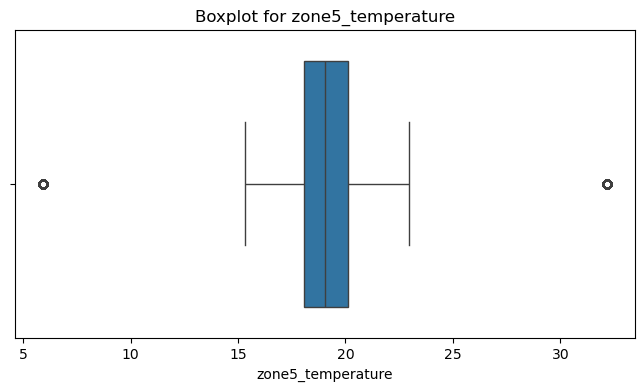

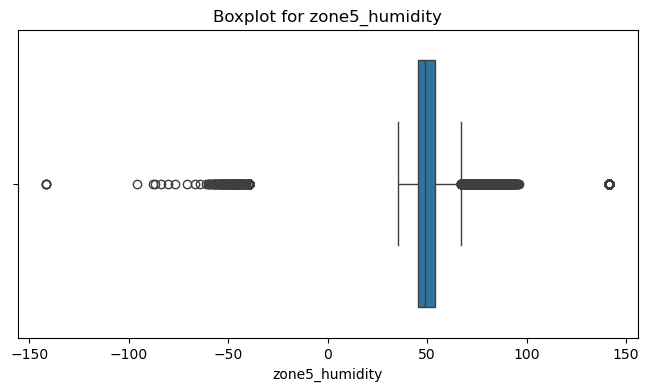

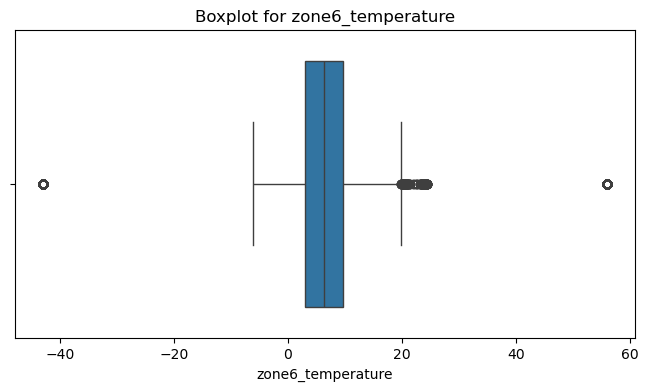

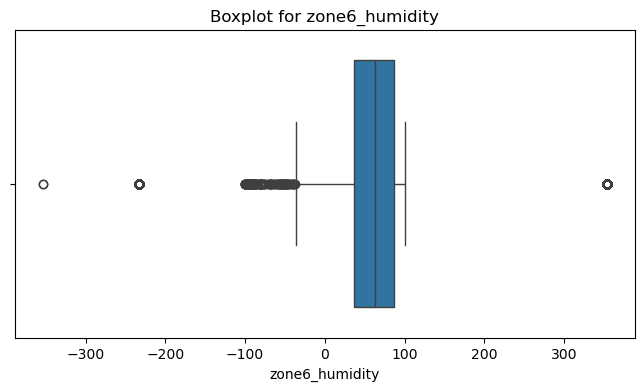

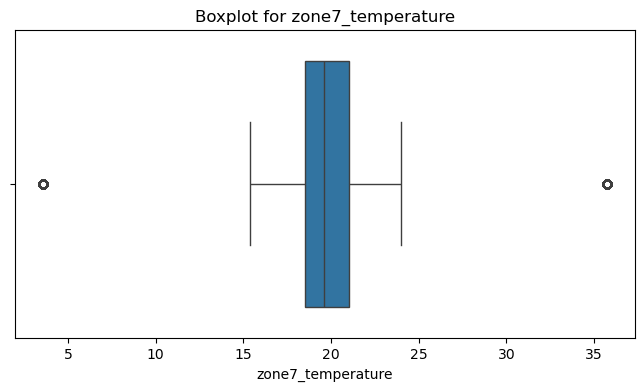

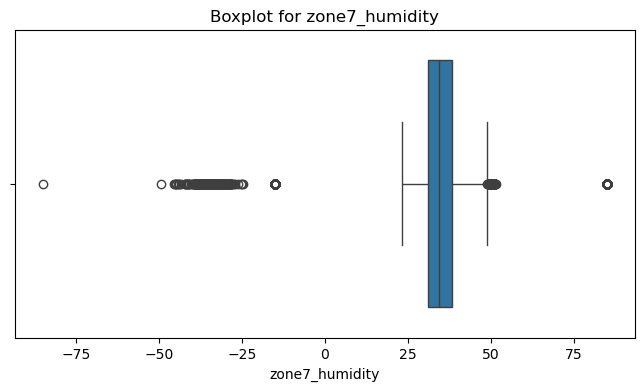

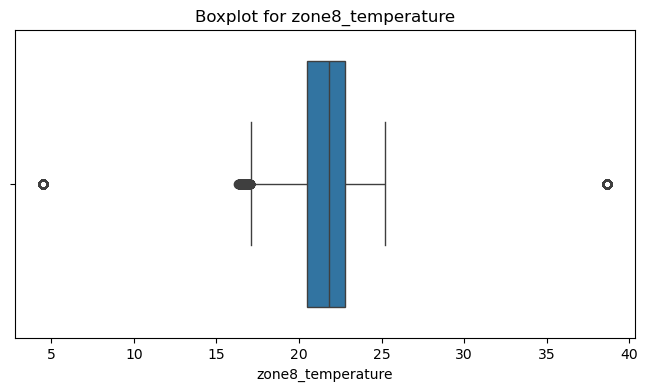

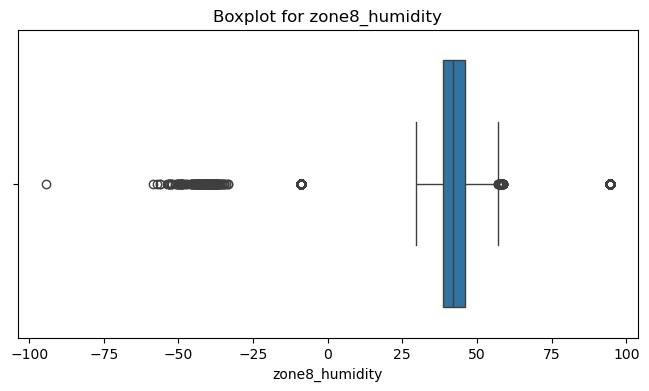

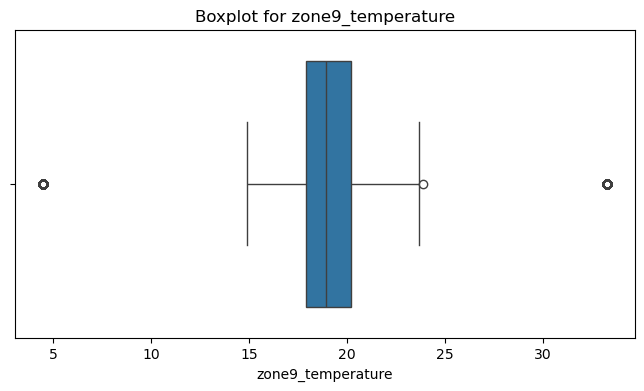

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numeric columns you want to check for outliers
columns_to_plot = df.columns[1:20]  # or list of your numeric column names

# Plot boxplots for each column
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()



In [8]:

# dropping the non-character data in column

# Convert  column to numeric, forcing invalid strings (like 'unknown') to NaN
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')

# Drop rows where temperature is NaN ( invalid or missing)
df.dropna(subset=['equipment_energy_consumption'], inplace=True)


In [9]:
df["equipment_energy_consumption"].unique()

df['equipment_energy_consumption'].value_counts().to_dict()



{50.0: 3400,
 60.0: 2385,
 40.0: 1762,
 70.0: 1193,
 80.0: 905,
 90.0: 790,
 100.0: 742,
 30.0: 656,
 110.0: 543,
 120.0: 391,
 20.0: 318,
 130.0: 256,
 140.0: 182,
 1139.9856929495108: 166,
 -944.5664110012308: 160,
 150.0: 109,
 190.0: 70,
 260.0: 68,
 280.0: 67,
 230.0: 66,
 300.0: 63,
 160.0: 62,
 240.0: 62,
 270.0: 61,
 180.0: 61,
 250.0: 60,
 220.0: 58,
 310.0: 56,
 210.0: 56,
 170.0: 55,
 370.0: 54,
 290.0: 53,
 350.0: 53,
 390.0: 52,
 320.0: 51,
 330.0: 50,
 360.0: 48,
 340.0: 48,
 200.0: 47,
 380.0: 38,
 400.0: 36,
 410.0: 34,
 -50.0: 32,
 440.0: 30,
 420.0: 27,
 430.0: 23,
 -40.0: 22,
 470.0: 18,
 450.0: 18,
 480.0: 18,
 510.0: 16,
 -60.0: 15,
 530.0: 14,
 590.0: 14,
 460.0: 13,
 490.0: 13,
 -70.0: 13,
 610.0: 12,
 600.0: 10,
 500.0: 10,
 580.0: 10,
 520.0: 10,
 10.0: 9,
 700.0: 9,
 630.0: 9,
 660.0: 9,
 540.0: 8,
 560.0: 8,
 -100.0: 8,
 -30.0: 8,
 620.0: 7,
 690.0: 7,
 640.0: 7,
 720.0: 6,
 710.0: 6,
 -110.0: 6,
 750.0: 6,
 550.0: 6,
 -130.0: 6,
 650.0: 5,
 570.0: 5,
 740.0:

In [10]:
# other column study
df["lighting_energy"].unique()

df['lighting_energy'].value_counts().to_dict()


{'0.0': 11078,
 '10.0': 1781,
 '20.0': 1267,
 '30.0': 450,
 '-77.78778596503064': 171,
 '86.00296632575207': 162,
 '-0.0': 106,
 '40.0': 67,
 '???': 24,
 '-10.0': 22,
 '-20.0': 16,
 'error': 13,
 'check': 9,
 'unknown': 9,
 '50.0': 6,
 '-30.0': 6,
 '-86.00296632575207': 3,
 '-40.0': 2,
 '60.0': 1,
 '70.0': 1}

In [11]:
df["zone1_temperature"].unique()
df['zone1_temperature'].value_counts().to_dict()


{'21.0': 452,
 '21.39': 433,
 '21.2': 420,
 '21.5': 416,
 '21.29': 404,
 '20.89': 389,
 '21.1': 371,
 '22.2': 363,
 '22.0': 353,
 '22.1': 352,
 '21.79': 351,
 '21.89': 351,
 '21.7': 344,
 '20.79': 338,
 '21.6': 313,
 '22.5': 264,
 '22.6': 263,
 '22.29': 258,
 '20.7': 258,
 '22.39': 256,
 '20.6': 243,
 '22.7': 237,
 '20.0': 217,
 '22.79': 204,
 '20.1': 200,
 '22.89': 182,
 '20.5': 181,
 '19.89': 179,
 '20.2': 169,
 '33.74660933896648': 159,
 '20.29': 153,
 '20.39': 149,
 '23.0': 149,
 '8.726817924356236': 147,
 '19.79': 142,
 '19.7': 140,
 '19.6': 133,
 '19.5': 105,
 '19.39': 99,
 '19.0': 97,
 '23.2': 93,
 '23.1': 88,
 '19.29': 83,
 '19.1': 79,
 '19.2': 76,
 '20.9266666666667': 67,
 '18.89': 65,
 '21.9266666666667': 64,
 '21.1666666666667': 63,
 '22.066666666666695': 62,
 '21.4266666666667': 61,
 '21.963333333333296': 60,
 '20.963333333333296': 59,
 '21.73': 59,
 '22.1333333333333': 59,
 '21.533333333333296': 58,
 '21.26': 57,
 '21.323333333333295': 56,
 '22.033333333333296': 56,
 '18.7

In [12]:
df["zone1_humidity"].unique()

df['zone1_humidity'].value_counts().to_dict()


{'3.348059697903068': 152,
 '76.29275599510133': 148,
 '37.2': 125,
 '39.09': 118,
 '36.9': 116,
 '37.7': 113,
 '38.29': 110,
 '39.0': 108,
 '38.79': 106,
 '37.09': 103,
 '38.09': 98,
 '37.4': 98,
 '39.4': 97,
 '38.7': 94,
 '36.29': 90,
 '38.2': 89,
 '35.4': 88,
 '38.59': 87,
 '35.2': 83,
 '39.5': 81,
 '39.2': 81,
 '39.9': 81,
 '39.59': 76,
 '35.5': 75,
 '43.29': 73,
 '37.0': 73,
 '38.0': 72,
 '36.09': 71,
 '35.29': 71,
 '37.5': 71,
 '37.9': 70,
 '35.79': 68,
 '37.29': 67,
 '38.4': 66,
 '37.59': 66,
 '41.29': 66,
 '35.7': 64,
 '41.5': 64,
 '39.7': 63,
 '43.7': 63,
 '41.0': 62,
 '38.9': 61,
 '36.2': 60,
 '42.09': 59,
 '38.5': 59,
 '36.59': 58,
 '37.79': 58,
 '39.29': 57,
 '43.09': 57,
 '41.4': 56,
 '40.29': 56,
 '41.2': 55,
 '40.5': 55,
 '39.79': 55,
 '43.79': 55,
 '42.4': 55,
 '36.7': 55,
 '36.79': 55,
 '35.0': 54,
 '42.5': 54,
 '43.4': 54,
 '35.59': 52,
 '40.9': 52,
 '43.9': 51,
 '41.9': 51,
 '44.0': 51,
 '41.7': 50,
 '43.59': 50,
 '40.59': 50,
 '36.0': 50,
 '40.0': 49,
 '35.09': 49,


In [13]:

df["zone2_temperature"].unique()

df['zone2_temperature'].value_counts().to_dict()


{'19.6': 287,
 '19.5': 284,
 '19.2': 282,
 '19.7': 278,
 '19.29': 253,
 '19.1': 246,
 '19.39': 238,
 '19.0': 232,
 '18.79': 230,
 '20.29': 227,
 '19.79': 221,
 '18.39': 220,
 '20.5': 219,
 '18.89': 219,
 '18.5': 217,
 '20.1': 216,
 '18.2': 209,
 '20.0': 203,
 '18.1': 199,
 '19.89': 196,
 '20.39': 193,
 '18.7': 191,
 '20.6': 188,
 '20.2': 183,
 '18.6': 180,
 '20.7': 175,
 '36.55288237266245': 170,
 '18.29': 170,
 '20.89': 163,
 '18.0': 162,
 '21.1': 162,
 '17.79': 158,
 '2.9881989040997503': 147,
 '20.79': 141,
 '21.2': 137,
 '21.0': 133,
 '17.5': 130,
 '21.29': 125,
 '17.89': 124,
 '21.7': 124,
 '17.7': 115,
 '21.89': 108,
 '17.6': 98,
 '21.5': 97,
 '17.29': 90,
 '17.39': 89,
 '21.6': 86,
 '19.566666666666695': 85,
 '17.2': 85,
 '17.1': 82,
 '22.0': 74,
 '21.39': 73,
 '21.79': 72,
 '19.1333333333333': 68,
 '16.89': 65,
 '18.823333333333295': 62,
 '22.1': 62,
 '19.6333333333333': 62,
 '19.323333333333295': 60,
 '19.8566666666667': 59,
 '19.26': 59,
 '20.566666666666695': 58,
 '19.76': 5

In [16]:
def non_numeric_remover(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df = df.dropna(subset=[column_name])
    return df

In [22]:
df=non_numeric_remover(df, "zone2_temperature") # i substituted for 4 object dtype columns 

In [23]:
df.shape   # some rows are removed

(12799, 29)

#### Till now I tried to remove the row with non numeric values;  row reduced from (16857) to (12799)

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   smart_factory_energy_prediction.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/

no changes added to commit (use "git add" and/or "git commit -a")


In [77]:
# commit data
!git status


#commit 
!git add smart_factory_energy_prediction.ipynb
!git commit -m "Preprocessing: Removed non-numeric values from 'equipment_energy_consumption',lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature"
!git push origin main

[main 851a6bb] Preprocessing: Removed non-numeric values from 'equipment_energy_consumption',lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature
 1 file changed, 32 insertions(+), 9 deletions(-)


To https://github.com/Sudeep-Sapkota/DS-Intern-Assignment--Sudeep_Sapkota-.git
   6e6bc5d..851a6bb  main -> main


In [27]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption      0
lighting_energy                   0
zone1_temperature                 0
zone1_humidity                    0
zone2_temperature                 0
zone2_humidity                  681
zone3_temperature               599
zone3_humidity                  654
zone4_temperature               639
zone4_humidity                  592
zone5_temperature               630
zone5_humidity                  608
zone6_temperature               656
zone6_humidity                  639
zone7_temperature               589
zone7_humidity                  600
zone8_temperature               633
zone8_humidity                  582
zone9_temperature               594
zone9_humidity                  683
outdoor_temperature             607
atmospheric_pressure            653
outdoor_humidity                604
wind_speed                      633
visibility_index                615
dew_point                       623
random_variable1            

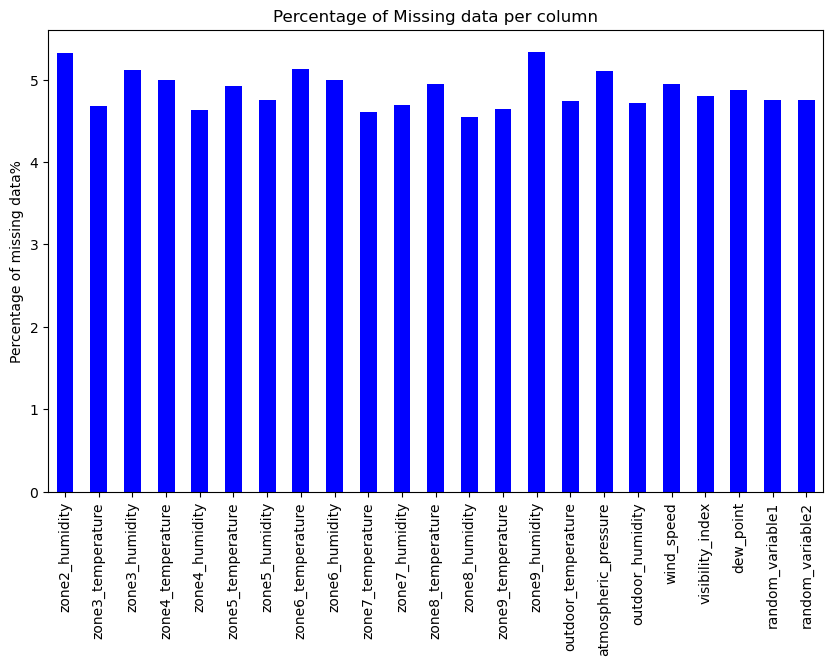

In [24]:
# Visualizing missing data as a bar plot
missing_data = df.isnull().mean() * 100  # Percentage of missing data per column
missing_data = missing_data[missing_data > 0]  # Only columns with missing data
missing_data.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Percentage of Missing data per column')
plt.ylabel('Percentage of missing data%')
plt.show()



In [83]:
# understanding the distribution
df.describe()


,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12118.000000,12200.000000,12145.000000,12160.000000,12207.000000,...,12205.000000,12116.000000,12192.000000,12146.000000,12195.000000,12166.000000,12184.000000,12176.000000,12191.000000,12191.000000
mean,95.056935,3.872928,21.265792,39.069961,19.804304,39.472915,21.658924,38.113092,20.245158,37.947905,...,18.861658,40.325636,6.221287,755.780347,78.899486,4.172699,38.537050,2.747512,24.869540,25.101668
std,180.659943,14.744025,2.194633,9.854723,2.954454,10.010114,2.626665,10.338425,2.773032,10.727844,...,2.509393,11.130238,7.693695,13.559764,28.262844,4.408763,21.398240,6.132992,26.084683,25.830670
min,-1139.985693,-86.002966,8.726818,-46.400000,2.988199,-77.265503,6.543921,-71.406273,4.613485,-50.290000,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,50.000000,0.000000,20.533333,37.030000,18.600000,37.730000,20.533333,36.617500,19.267500,35.200000,...,17.890000,38.230000,3.000000,750.833333,71.000000,2.000000,29.000000,0.433333,12.079695,12.055228
50%,60.000000,0.000000,21.356667,39.230000,19.626667,40.290000,21.790000,38.400000,20.290000,38.090000,...,18.890000,40.360000,6.000000,756.216667,84.000000,4.000000,40.000000,2.766667,24.837556,24.834261
75%,100.000000,0.000000,22.100000,42.485833,20.790000,42.984167,22.760000,41.433333,21.390000,41.530000,...,20.200000,43.737500,9.300000,762.100000,91.833333,5.833333,40.000000,5.300000,37.897387,37.955683
max,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,81.446225,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [28]:
# applying transforation to skewd dataset
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

df[['zone1_temperature']] = pt.fit_transform(df[['zone1_temperature']])
df[['equipment_energy_consumption']] = pt.fit_transform(df[['equipment_energy_consumption']])
df[['zone1_humidity']] = pt.fit_transform(df[['zone1_humidity']])
df[['zone2_temperature']] = pt.fit_transform(df[['zone2_temperature']])
# as these 4 column has sekewd distribution


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [31]:
df.describe()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12118.000000,12200.000000,12145.000000,12160.000000,12207.000000,...,12205.000000,12116.000000,12192.000000,12146.000000,12195.000000,12166.000000,12184.000000,12176.000000,12191.000000,12191.000000
mean,0.412634,0.522516,0.473942,0.396517,0.463679,0.755437,0.499173,0.766875,0.499292,0.669807,...,0.500153,0.747146,0.500649,0.500026,0.677967,0.499564,0.499582,0.499422,0.499574,0.500487
std,0.088419,0.085718,0.088211,0.093778,0.089110,0.064777,0.086746,0.072392,0.088574,0.081434,...,0.087248,0.068215,0.088050,0.087351,0.063750,0.087740,0.088446,0.087901,0.089846,0.088845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.386020,0.500000,0.443642,0.359118,0.426138,0.744158,0.462001,0.756403,0.468065,0.648948,...,0.466370,0.734303,0.463783,0.468158,0.660149,0.456325,0.460162,0.466255,0.455521,0.455614
50%,0.391106,0.500000,0.476761,0.388788,0.457149,0.760724,0.503502,0.768884,0.500725,0.670886,...,0.501138,0.747357,0.498117,0.502837,0.689472,0.496127,0.505629,0.499697,0.499464,0.499567
75%,0.411799,0.500000,0.506860,0.434217,0.492603,0.778159,0.535537,0.790124,0.535860,0.696999,...,0.546685,0.768057,0.535883,0.540737,0.707141,0.532613,0.505629,0.536006,0.544448,0.544699
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### as there is aprrox 5% missing values in the 23 column  we need to do substiturion by either mean or median  
####  taking median for float values column 



In [32]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Fill missing values with median for each numeric column
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [33]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,0.391106,0.047761,1.00000,0.509038,0.444229,0.789845,0.437452,0.768884,0.459521,...,0.436584,0.779043,0.504983,0.356497,0.707517,0.555831,0.600695,0.536006,0.459640,0.459811
1,2016-01-11 17:10:00,0.391106,0.674413,0.41793,0.495510,0.444229,0.789408,0.437452,0.813628,0.459521,...,0.437743,0.779227,0.503648,0.357142,0.707517,0.549197,0.584851,0.534573,0.478001,0.478146
2,2016-01-11 17:20:00,0.386020,0.674413,0.41793,0.489660,0.444229,0.788788,0.437452,0.814632,1.000000,...,0.435425,0.778859,0.502313,0.357786,0.707517,0.542563,0.569006,0.533139,0.512571,0.512667
3,2016-01-11 17:30:00,0.386020,0.732550,1.00000,0.486201,0.444229,0.788551,0.437452,0.815098,0.500725,...,0.435425,0.778246,0.500978,0.358430,0.707517,0.535930,0.553162,1.000000,0.570325,0.570339
4,2016-01-11 17:40:00,0.391106,0.732550,0.41793,0.490155,0.444229,0.788162,0.437452,0.815098,0.456007,...,0.000000,0.778246,0.499643,0.359074,0.707517,0.529296,0.537318,0.530273,0.448648,0.448834


In [34]:
df.head(-5)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,0.391106,0.047761,1.000000,0.509038,0.444229,0.789845,0.437452,0.768884,0.459521,...,0.436584,0.779043,0.504983,0.356497,0.707517,0.555831,0.600695,0.536006,0.459640,0.459811
1,2016-01-11 17:10:00,0.391106,0.674413,0.417930,0.495510,0.444229,0.789408,0.437452,0.813628,0.459521,...,0.437743,0.779227,0.503648,0.357142,0.707517,0.549197,0.584851,0.534573,0.478001,0.478146
2,2016-01-11 17:20:00,0.386020,0.674413,0.417930,0.489660,0.444229,0.788788,0.437452,0.814632,1.000000,...,0.435425,0.778859,0.502313,0.357786,0.707517,0.542563,0.569006,0.533139,0.512571,0.512667
3,2016-01-11 17:30:00,0.386020,0.732550,1.000000,0.486201,0.444229,0.788551,0.437452,0.815098,0.500725,...,0.435425,0.778246,0.500978,0.358430,0.707517,0.535930,0.553162,1.000000,0.570325,0.570339
4,2016-01-11 17:40:00,0.391106,0.732550,0.417930,0.490155,0.444229,0.788162,0.437452,0.815098,0.456007,...,0.000000,0.778246,0.499643,0.359074,0.707517,0.529296,0.537318,0.530273,0.448648,0.448834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16844,2016-05-07 04:20:00,0.380980,0.500000,0.575972,0.368467,0.518504,0.752808,0.593000,0.766970,0.606450,...,0.601968,0.765314,0.567165,0.475888,0.689472,0.436424,0.505629,0.538395,0.500705,0.500818
16848,2016-08-02 18:20:00,0.619880,0.616275,0.540551,0.450505,0.543122,0.758416,0.595202,0.799880,0.526597,...,0.501138,0.754712,0.520243,0.407174,0.657141,0.496127,0.467051,0.498264,0.421043,0.421268
16849,2016-09-02 21:40:00,0.427588,0.500000,0.540551,0.451081,0.539818,0.763960,0.530253,0.804805,0.468784,...,0.501138,0.750421,0.000000,0.383554,1.000000,0.562465,0.505629,0.492053,0.583665,0.499567
16850,2016-09-04 03:00:00,0.386020,0.500000,0.466411,0.416904,0.419828,0.792023,0.547866,0.779387,0.507432,...,0.000000,0.763537,0.484383,0.477606,0.705261,0.456325,0.439496,0.510207,0.468423,0.468582


In [44]:
#removing timestamp as not useful for prediction
df.drop("timestamp",axis=1,inplace=True)

In [36]:
# data is cleaned and ready for further process!!

In [38]:
# commit data
!git status


#commit 
!git add smart_factory_energy_prediction.ipynb
!git commit -m "Data is cleaned and now ready for further processing"
!git push origin main

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/

nothing added to commit but untracked files present (use "git add" to track)
On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/

nothing added to commit but untracked files present (use "git add" to track)


Everything up-to-date


### Target feature -->equipment_energy_consumption  , so making it target label


In [45]:
X = df.drop('equipment_energy_consumption', axis=1)  # Features
y = df['equipment_energy_consumption']               # Target


In [46]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)  # 20% test data


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = lr_model.predict(X_test)

# Step 3: Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 4: Print results
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")


RMSE: 0.092
MAE: 0.044
R² Score: 0.005


In [48]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,0.391106,0.047761,1.00000,0.509038,0.444229,0.789845,0.437452,0.768884,0.459521,0.727641,...,0.436584,0.779043,0.504983,0.356497,0.707517,0.555831,0.600695,0.536006,0.459640,0.459811
1,0.391106,0.674413,0.41793,0.495510,0.444229,0.789408,0.437452,0.813628,0.459521,0.730873,...,0.437743,0.779227,0.503648,0.357142,0.707517,0.549197,0.584851,0.534573,0.478001,0.478146
2,0.386020,0.674413,0.41793,0.489660,0.444229,0.788788,0.437452,0.814632,1.000000,0.730095,...,0.435425,0.778859,0.502313,0.357786,0.707517,0.542563,0.569006,0.533139,0.512571,0.512667
3,0.386020,0.732550,1.00000,0.486201,0.444229,0.788551,0.437452,0.815098,0.500725,0.728830,...,0.435425,0.778246,0.500978,0.358430,0.707517,0.535930,0.553162,1.000000,0.570325,0.570339
4,0.391106,0.732550,0.41793,0.490155,0.444229,0.788162,0.437452,0.815098,0.456007,0.727363,...,0.000000,0.778246,0.499643,0.359074,0.707517,0.529296,0.537318,0.530273,0.448648,0.448834


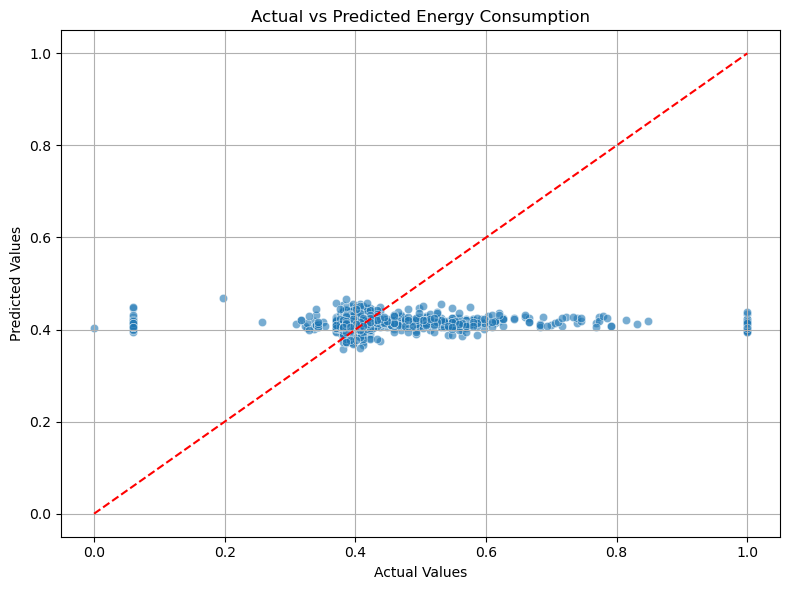

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Energy Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict on test data
y_pred_rf = rf_model.predict(X_test)

# 3. Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 4. Print results
print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest MAE: {mae_rf:.3f}")
print(f"Random Forest R² Score: {r2_rf:.3f}")


Random Forest RMSE: 0.090
Random Forest MAE: 0.040
Random Forest R² Score: 0.058


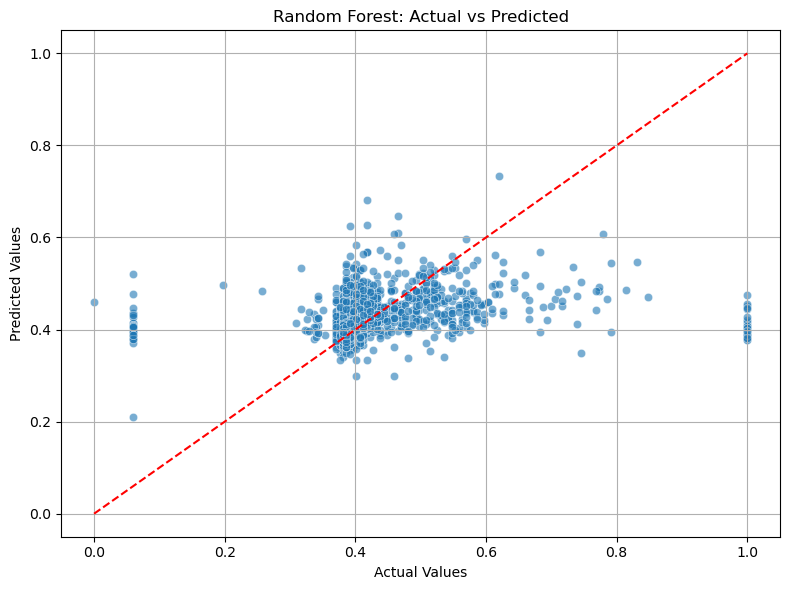

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()
